In [9]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Input

In [ ]:
# Load top 10,000 most frequent words
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to have equal length
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [11]:
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=num_words, output_dim=32),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=512,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5894 - loss: 0.6866 - val_accuracy: 0.7044 - val_loss: 0.6394
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7595 - loss: 0.6013 - val_accuracy: 0.7915 - val_loss: 0.4896
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8303 - loss: 0.4439 - val_accuracy: 0.8490 - val_loss: 0.3766
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8728 - loss: 0.3377 - val_accuracy: 0.8614 - val_loss: 0.3345
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8827 - loss: 0.2952 - val_accuracy: 0.8719 - val_loss: 0.3105
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8964 - loss: 0.2620 - val_accuracy: 0.8755 - val_loss: 0.2983
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9091 - loss: 0.2360 - val_accuracy: 0.8758 - val_loss: 0.2956
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9164 - loss: 0.2228 - val_accuracy: 0.8770 - v

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.8804 - loss: 0.2889
Test Accuracy: 0.88


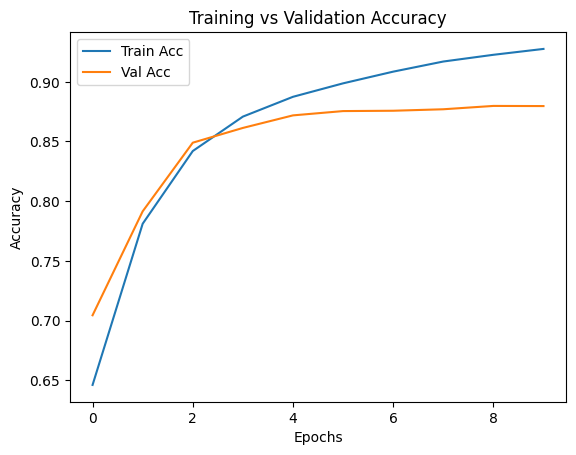

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [14]:
# Make predictions on the test data
pred_probs = model.predict(X_test)

# Convert probabilities to binary class output (0 or 1)
predictions = (pred_probs > 0.5).astype("int32")

# Print first 10 predictions and actual labels for comparison
for i in range(10):
    print(f"Review {i + 1}: Predicted = {predictions[i][0]}, Actual = {y_test[i]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step
Review 1: Predicted = 0, Actual = 0
Review 2: Predicted = 1, Actual = 1
Review 3: Predicted = 1, Actual = 1
Review 4: Predicted = 0, Actual = 0
Review 5: Predicted = 1, Actual = 1
Review 6: Predicted = 1, Actual = 1
Review 7: Predicted = 1, Actual = 1
Review 8: Predicted = 0, Actual = 0
Review 9: Predicted = 1, Actual = 0
Review 10: Predicted = 1, Actual = 1
